In [1]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Conv1D,Dropout,Activation,MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

In [6]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=5000)

X_train=sequence.pad_sequences(X_train,maxlen=500)
X_test=sequence.pad_sequences(X_test,maxlen=500)

model=Sequential()
model.add(Embedding(5000,500))
model.add(Dropout(0.5))
model.add(LSTM(64,return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

early_stopping_callback=EarlyStopping(monitor='val_loss',patience=3)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 500)         2500000   
                                                                 
 dropout_2 (Dropout)         (None, None, 500)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          144640    
                                                                 
 attention_1 (Attention)     (None, 128)               20480     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
 activation (Activation)     (None, 1)                

In [7]:
history=model.fit(X_train,y_train,batch_size=40,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stopping_callback])

print('\n Test Accuracy:%.4f'%(model.evaluate(X_test,y_test)[1]))

Epoch 1/100
625/625 [==============================] - 28s 33ms/step - loss: 0.3873 - accuracy: 0.8233 - val_loss: 0.3062 - val_accuracy: 0.8786
Epoch 2/100
625/625 [==============================] - 20s 32ms/step - loss: 0.2285 - accuracy: 0.9109 - val_loss: 0.2673 - val_accuracy: 0.8892
Epoch 3/100
625/625 [==============================] - 21s 34ms/step - loss: 0.1683 - accuracy: 0.9336 - val_loss: 0.2862 - val_accuracy: 0.8822
Epoch 4/100
625/625 [==============================] - 23s 37ms/step - loss: 0.1207 - accuracy: 0.9536 - val_loss: 0.3261 - val_accuracy: 0.8825
Epoch 5/100
782/782 [==============================] - 9s 11ms/step - loss: 0.4121 - accuracy: 0.8806

 Test Accuracy:0.8806


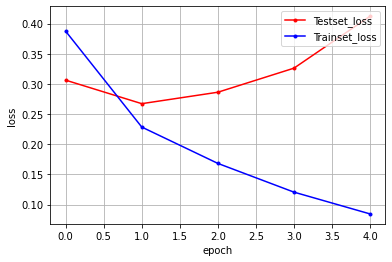

In [8]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']
x_len=np.arange(len(y_loss))

plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()